In [1]:
import bokeh
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from math import pi
from bokeh.palettes import Category20c
from bokeh.palettes import Spectral4, Spectral5
from bokeh.transform import cumsum
from bokeh.plotting import figure, output_notebook, show 
output_notebook()

Loading BokehJS ...

# 1. Plots for Tripadvisor

In [2]:
df = pd.read_csv('reg.csv')
# Drop missing values (673 rows)
df= df.dropna(subset=['avg_rating', 'authentity_score', 
                    'culture_score', 
                     'michelin', 'review_count','is_cul_neighborhood',
                     'is_match_culture', 'catergory_num'])

df = df.reset_index(drop=True)

df['avg_rating'] = pd.to_numeric(df['avg_rating'],errors='coerce')
df['review_count'] = pd.to_numeric(df['review_count'],errors='coerce')
df['service_rating'] = pd.to_numeric(df['service_rating'],errors='coerce')
df['value_rating'] = pd.to_numeric(df['value_rating'],errors='coerce')
df['atmosphere_rating'] = pd.to_numeric(df['atmosphere_rating'],errors='coerce')
df['food_rating'] = pd.to_numeric(df['atmosphere_rating'],errors='coerce')

df.head()

,restaurant_name,link,price_range,category,michelin,ranking,avg_rating,food_rating,service_rating,value_rating,...,authentity_score,review,word_count,culture_word_count,culture_score,is_cul_neighborhood,is_match_culture,catergory_num,price_class_2.5,price_class_4.0
0,Bryn Mawr Breakfast Club,https://www.tripadvisor.com/Restaurant_Review-...,[],"['american', 'cafe', 'vegetarian friendly']",0,363,4,NaN,NaN,NaN,...,59.025974,"{'for': 93, 'pair': 2, 'of': 160, 'year': 6, '...",9631,2,0.000208,0,0,3,1,0
1,Tre Kronor,https://www.tripadvisor.com/Restaurant_Review-...,[],"['european', 'swedish', 'scandinavian']",0,19,4,4.5,4.5,4.5,...,65.488372,"{'being': 11, 'swedish': 115, 'came': 12, 'to'...",11486,146,0.012711,0,0,3,1,0
2,Via Veneto Ristorante,https://www.tripadvisor.com/Restaurant_Review-...,"[30, 30]","['italian', 'vegetarian friendly']",0,195,4,4.5,5.0,4.5,...,66.220000,"{'via': 31, 'veneto': 31, 'ristorante': 6, 'ha...",3934,38,0.009659,0,0,2,1,0
3,Hoanh Long Vietnamese & Chinese Restaurant,https://www.tripadvisor.com/Restaurant_Review-...,[],"['chinese', 'asian', 'vietnamese']",0,53,4,4.5,4.0,4.5,...,63.533333,"{'choose': 2, 'the': 112, 'hot': 5, 'pot': 3, ...",1818,19,0.010451,0,0,3,0,0
4,Martino's,https://www.tripadvisor.com/Restaurant_Review-...,[],"['italian', 'pizza', 'vegetarian friendly']",0,1,4,NaN,NaN,NaN,...,68.312500,"{'we': 51, 'like': 15, 'to': 50, 'come': 3, 'm...",2378,16,0.006728,0,0,3,1,0


## 1.1 Restaurant Counts for 7 Cultural Neighborhoods

In [3]:
x = {
    'Arabic': len(df[df['cultural_neighborhood'] == 'arabic']),
    'Chinese': len(df[df['cultural_neighborhood'] == 'chinese']),
    'German': len(df[df['cultural_neighborhood'] == 'german']),
    'Italian': len(df[df['cultural_neighborhood'] == 'italian']),
    'Mexican': len(df[df['cultural_neighborhood'] == 'mexican']),
    'Polish': len(df[df['cultural_neighborhood'] == 'polish']),
    'Puerto Rican': len(df[df['cultural_neighborhood'] == 'puerto rican']),
    }

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'culture'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(height=350, title="Restaurant Counts for 7 Cultural Neighborhoods", 
           toolbar_location=None, tools="hover", tooltips="@culture: @value", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='culture', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

## 1.2 Restaurant Counts for 7 Cultural Neighborhoods and Other Neighborhoods

In [4]:
x = {
    'Arabic': len(df[df['cultural_neighborhood'] == 'arabic']),
    'Chinese': len(df[df['cultural_neighborhood'] == 'chinese']),
    'German': len(df[df['cultural_neighborhood'] == 'german']),
    'Italian': len(df[df['cultural_neighborhood'] == 'italian']),
    'Mexican': len(df[df['cultural_neighborhood'] == 'mexican']),
    'Polish': len(df[df['cultural_neighborhood'] == 'polish']),
    'Puerto Rican': len(df[df['cultural_neighborhood'] == 'puerto rican']),
    'Other': len(df[df['cultural_neighborhood'] == 'None'])
     }

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'culture'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(height=350, title="Restaurant Counts for 7 Cultural Neighborhoods and Other Neighborhoods", 
           toolbar_location=None, tools="hover", tooltips="@culture: @value", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='culture', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

## 1.3 Restaurant Counts by Average Rating

In [5]:
df_score_range = df[(df['authentity_score'] < 100)&(df['authentity_score'] >= 90)]
print('Num of restaurants which average rating is 3:', len(df_score_range[df_score_range['avg_rating'] == 3]),'\n'
      'Num of restaurants which average rating is 4:', len(df_score_range[df_score_range['avg_rating'] == 4]),'\n'
      'Num of restaurants which average rating is 5:', len(df_score_range[df_score_range['avg_rating'] == 5]),'\n')

Num of restaurants which average rating is 3: 0 
Num of restaurants which average rating is 4: 0 
Num of restaurants which average rating is 5: 0 



In [6]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
avg_rating = ["3", "4", "5"]
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

data = {'authentity_score' : authentity_score,
        '3' : [1, 0, 1, 0, 0, 21, 17, 11, 0, 0],
        '4' : [0, 0, 0, 3, 14, 252, 278, 49, 4, 0],
        '5' : [0, 0, 0, 0, 0, 9, 8, 3, 1, 0]}

p = figure(x_range=authentity_score, height=500, title="Restaurant Counts by Average Rating",
           toolbar_location=None, tools="hover", tooltips="$name @avg_rating: @$name")
p.vbar_stack(avg_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=avg_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.legend.orientation = "horizontal"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)

## 1.4 Restaurant Counts for Culture Neighborhood by Average Rating

In [7]:
df_is_cul = df[df['is_cul_neighborhood'] == 1]
df_score_range = df_is_cul[(df_is_cul['authentity_score'] < 100)&(df_is_cul['authentity_score'] >= 90)]

print('Num of restaurants which average rating is 3:', len(df_score_range[df_score_range['avg_rating'] == 3]),'\n'
      'Num of restaurants which average rating is 4:', len(df_score_range[df_score_range['avg_rating'] == 4]),'\n'
      'Num of restaurants which average rating is 5:', len(df_score_range[df_score_range['avg_rating'] == 5]),'\n')

Num of restaurants which average rating is 3: 0 
Num of restaurants which average rating is 4: 0 
Num of restaurants which average rating is 5: 0 



In [8]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
avg_rating = ["3", "4", "5"]
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

data = {'authentity_score' : authentity_score,
        '3' : [1, 0, 0, 0, 0, 5, 5, 10, 0, 0],
        '4' : [0, 0, 0, 1, 6, 93,125, 34, 3, 0],
        '5' : [0, 0, 0, 0, 0, 7, 6, 3, 0, 0]}

p = figure(x_range=authentity_score, height=500, title="Restaurant Counts for Culture Neighborhood (by Average Rating)",
           toolbar_location=None, tools="hover", tooltips="$name @avg_rating: @$name")
p.vbar_stack(avg_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=avg_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)

## 1.5 Restaurant Counts for Serving Culturally Matched Cuisine by Average Rating

In [9]:
df_match_cul = df[df['is_match_culture'] == 1]
df_score_range = df_match_cul[(df_match_cul['authentity_score'] <= 100)&(df_match_cul['authentity_score'] >= 90)]

print('Num of restaurants which average rating is 3:', len(df_score_range[df_score_range['avg_rating'] == 3]),'\n'
      'Num of restaurants which average rating is 4:', len(df_score_range[df_score_range['avg_rating'] == 4]),'\n'
      'Num of restaurants which average rating is 5:', len(df_score_range[df_score_range['avg_rating'] == 5]),'\n')

Num of restaurants which average rating is 3: 0 
Num of restaurants which average rating is 4: 0 
Num of restaurants which average rating is 5: 0 



In [10]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
avg_rating = ["3", "4", "5"]
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

data = {'authentity_score' : authentity_score,
        '3' : [0, 0, 0, 0, 0, 2, 2, 3, 0, 0],
        '4' : [0, 0, 0, 0, 0, 9, 23, 10, 3, 0],
        '5' : [0, 0, 0, 0, 0, 1, 3, 2, 0, 0]}

p = figure(x_range=authentity_score, height=500, title="Restaurant Counts for Serving Culturally Matched Cuisine (by Average Rating)",
           toolbar_location=None, tools="hover", tooltips="$name @avg_rating: @$name")
p.vbar_stack(avg_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=avg_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)

## 1.6 Restaurant Counts by Food Rating

In [11]:
df_score_range = df[(df['authentity_score'] < 100)&(df['authentity_score'] >= 90)]

print('Num of restaurants which food rating is 3.5:', len(df_score_range[df_score_range['food_rating'] == 3.5]),'\n'
      'Num of restaurants which food rating is 4:', len(df_score_range[df_score_range['food_rating'] == 4]),'\n'
      'Num of restaurants which food rating is 4.5:', len(df_score_range[df_score_range['food_rating'] == 4.5]),'\n'
      'Num of restaurants which food rating is 5:', len(df_score_range[df_score_range['food_rating'] == 5]),'\n')

Num of restaurants which food rating is 3.5: 0 
Num of restaurants which food rating is 4: 0 
Num of restaurants which food rating is 4.5: 0 
Num of restaurants which food rating is 5: 0 



In [12]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
food_rating = ["3.5", "4", "4.5", "5"]
colors = ['#2b83ba', '#abdda4', '#fdae61', '#d7191c']

data = {'authentity_score' : authentity_score,
        '3.5': [0, 0, 0, 1, 1, 19, 15, 4, 0, 0],
        '4'  : [0, 0, 1, 0, 3, 68, 102, 15, 0, 0],
        '4.5': [0, 0, 0, 0, 0, 39, 61, 14, 0, 0],
        '5'  : [0, 0, 0, 0, 0, 0, 3, 2, 0, 0]}

p = figure(x_range=authentity_score, height=500, title="Restaurant Counts by Food Rating",
           toolbar_location=None, tools="hover", tooltips="$name @food_rating: @$name")
p.vbar_stack(food_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=food_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)

## 1.7 Restaurant Counts for Culture Neighborhood by Food Rating

In [13]:
df_is_cul = df[df['is_cul_neighborhood'] == 1]
df_score_range = df_is_cul[(df_is_cul['authentity_score'] < 100)&(df_is_cul['authentity_score'] >= 90)]

print('Num of restaurants which food rating is 3.5:', len(df_score_range[df_score_range['food_rating'] == 3.5]),'\n'
      'Num of restaurants which food rating is 4:', len(df_score_range[df_score_range['food_rating'] == 4]),'\n'
      'Num of restaurants which food rating is 4.5:', len(df_score_range[df_score_range['food_rating'] == 4.5]),'\n'
      'Num of restaurants which food rating is 5:', len(df_score_range[df_score_range['food_rating'] == 5]),'\n')

Num of restaurants which food rating is 3.5: 0 
Num of restaurants which food rating is 4: 0 
Num of restaurants which food rating is 4.5: 0 
Num of restaurants which food rating is 5: 0 



In [14]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
food_rating = ["3.5", "4", "4.5", "5"]
colors = ['#2b83ba', '#abdda4', '#fdae61', '#d7191c']

data = {'authentity_score' : authentity_score,
        '3.5': [0, 0, 0, 0, 1, 2, 1, 3, 0, 0],
        '4'  : [0, 0, 0, 0, 1, 30, 47, 13, 0, 0],
        '4.5': [0, 0, 0, 0, 0, 16, 33, 10, 0, 0],
        '5'  : [0, 0, 0, 0, 0, 0, 2, 2, 0, 0]}

p = figure(x_range=authentity_score, height=500, title="Restaurant Counts for Culture Neighborhood (by Food Rating)",
           toolbar_location=None, tools="hover", tooltips="$name @avg_rating: @$name")
p.vbar_stack(food_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=food_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)

## 1.8 Restaurant Counts for Serving Culturally Matched Cuisine by Food Rating

In [15]:
df_match_cul = df[df['is_match_culture'] == 1]
df_score_range = df_match_cul[(df_match_cul['authentity_score'] < 100)&(df_is_cul['authentity_score'] >= 90)]

print('Num of restaurants which food rating is 3.5:', len(df_score_range[df_score_range['food_rating'] == 3.5]),'\n'
      'Num of restaurants which food rating is 4:', len(df_score_range[df_score_range['food_rating'] == 4]),'\n'
      'Num of restaurants which food rating is 4.5:', len(df_score_range[df_score_range['food_rating'] == 4.5]),'\n'
      'Num of restaurants which food rating is 5:', len(df_score_range[df_score_range['food_rating'] == 5]),'\n')

Num of restaurants which food rating is 3.5: 0 
Num of restaurants which food rating is 4: 0 
Num of restaurants which food rating is 4.5: 0 
Num of restaurants which food rating is 5: 0 



/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_36957/1819566239.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_score_range = df_match_cul[(df_match_cul['authentity_score'] < 100)&(df_is_cul['authentity_score'] >= 90)]


In [16]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
food_rating = ["3.5", "4", "4.5", "5"]
colors = ['#2b83ba', '#abdda4', '#fdae61', '#d7191c']

data = {'authentity_score' : authentity_score,
        '3.5': [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        '4'  : [0, 0, 0, 0, 0, 3, 11, 3, 0, 0],
        '4.5': [0, 0, 0, 0, 0, 2, 5, 4, 0, 0],
        '5'  : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

p = figure(x_range=authentity_score, height=500, title="Restaurant Counts for Serving Culturally Matched Cuisine (by Food Rating)",
           toolbar_location=None, tools="hover", tooltips="$name @avg_rating: @$name")
p.vbar_stack(food_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=food_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)

## 1.9 Chinese Restaurants Counts for Serving Culturally Matched Cuisine by Authentity Score

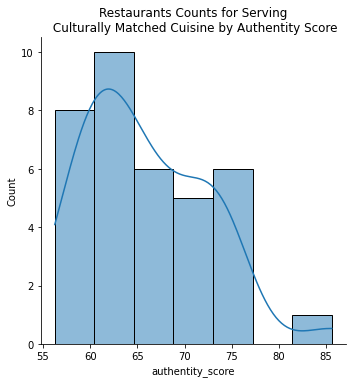

In [17]:
df_in = df[(df['category'].str.contains('chinese')) & (df['is_match_culture'] == 1)]
sns.displot(df_in, x="authentity_score", kde=True)
plt.title("Restaurants Counts for Serving\n Culturally Matched Cuisine by Authentity Score");

## 1.10 Chinese Restaurants Counts for Serving\n Culturally Non-Matched Cuisine by Authentity Score

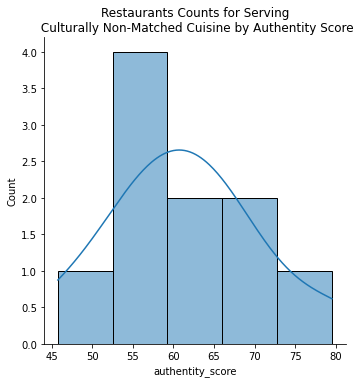

In [18]:
df_out = df[(df['category'].str.contains('chinese')) & (df['is_match_culture'] == 0)]
sns.displot(df_out, x="authentity_score", kde=True)
plt.title("Restaurants Counts for Serving\n Culturally Non-Matched Cuisine by Authentity Score");

## 1.11 Chinese Restaurant Counts Located in Chinatown and Other Neighborhoods

In [19]:
df_chinese = df[df['category'].str.contains('chinese')]
x = {
    'Chinatown': len(df_chinese[df['is_match_culture'] == 1]),
    'Other': len(df_chinese[df['is_match_culture'] == 0])
     }

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'culture'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = ['#fdae61', '#2b83ba']

p = figure(height=350, title="Chinese Restaurant Counts Located in Chinatown and Other Neighborhoods", 
           toolbar_location=None, tools="hover", tooltips="@culture: @value", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='culture', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_36957/319116275.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Chinatown': len(df_chinese[df['is_match_culture'] == 1]),
/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_36957/319116275.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Other': len(df_chinese[df['is_match_culture'] == 0])


## 1.12 Comparison of Culture Neighborhood's and Other Neighborhoods's Chinese Restaurants Distribution Based on Authentity Socre

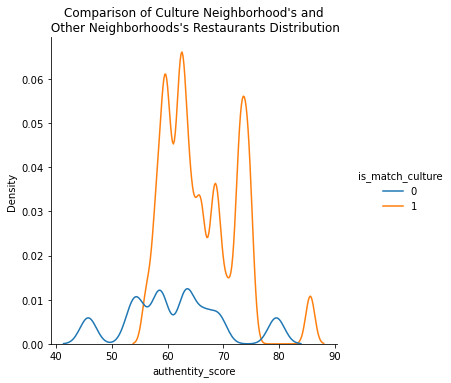

In [20]:
df_chinese = df[df['category'].str.contains('chinese')]
sns.displot(df_chinese, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 1.13 Comparison of Culture Neighborhood's and Other Neighborhoods's Chinese Restaurants Distribution by Food Rating

In [21]:
df_chinese = df[df['category'].str.contains('chinese')]
df_match_cul = df_chinese[df_chinese['is_match_culture'] == 1]
df_score_range = df_match_cul[(df_match_cul['authentity_score'] < 100)&(df_match_cul['authentity_score'] >= 90)]

print('Num of restaurants which average rating is 3:', len(df_score_range[df_score_range['avg_rating'] == 3]),'\n'
      'Num of restaurants which average rating is 4:', len(df_score_range[df_score_range['avg_rating'] == 4]),'\n'
      'Num of restaurants which average rating is 5:', len(df_score_range[df_score_range['avg_rating'] == 5]),'\n')

Num of restaurants which average rating is 3: 0 
Num of restaurants which average rating is 4: 0 
Num of restaurants which average rating is 5: 0 



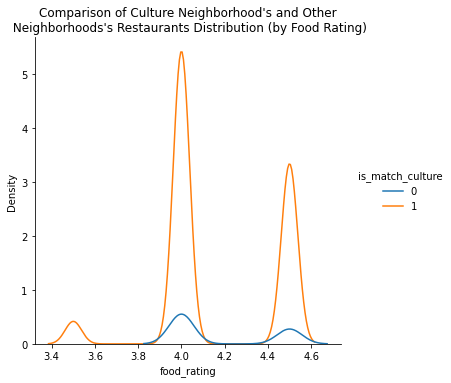

In [22]:
df_chinese = df[df['category'].str.contains('chinese')]
sns.displot(df_chinese, x="food_rating", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and Other\n Neighborhoods's Restaurants Distribution (by Food Rating)");

## 1.14 Comparison of Culture Neighborhood's and Other Neighborhoods's Polish Restaurants Distribution Based on Authentity Score

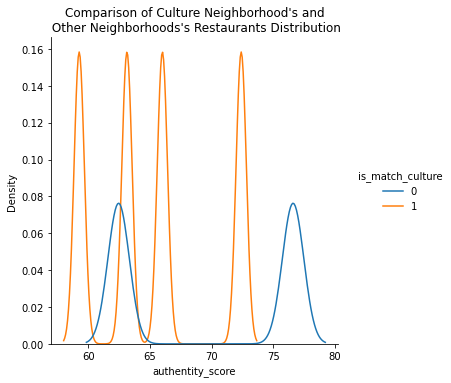

In [23]:
df_polish = df[df['category'].str.contains('polish')]
sns.displot(df_polish, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.1)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");


## 1.15 Comparison of Culture Neighborhood's and Other Neighborhoods's German Restaurants Distribution Based on Authentity Score

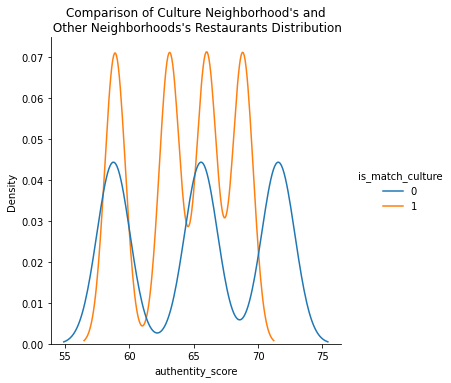

In [24]:
df_german = df[df['category'].str.contains('german')]
sns.displot(df_german, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 1.16 Comparison of Culture Neighborhood's and Other Neighborhoods's German Restaurants Distribution Based on Food Rating

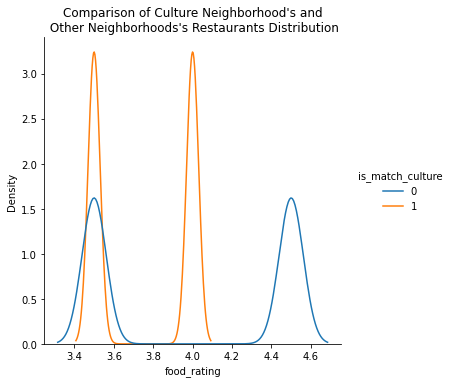

In [25]:
df_german = df[df['category'].str.contains('german')]
sns.displot(df_german, x="food_rating", hue="is_match_culture", kind="kde", bw_adjust=.1)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 1.17 Comparison of Culture Neighborhood's and Other Neighborhoods's Italian Restaurants Distribution Based on Authentity Score

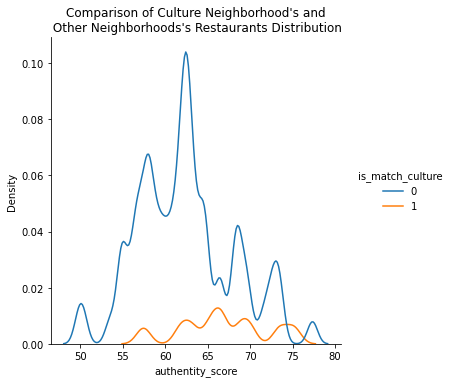

In [26]:
df_italian = df[df['category'].str.contains('italian')]
sns.displot(df_italian, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 1.18 Comparison of Culture Neighborhood's and Other Neighborhoods's Italian Restaurants Distribution Based on Food Rating

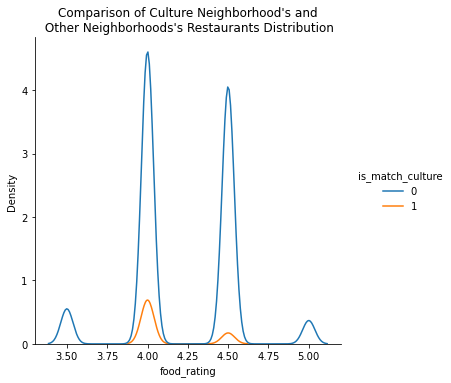

In [27]:
# based on average rating
df_italian = df[df['category'].str.contains('italian')]
sns.displot(df_italian, x="food_rating", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

# 2. Plots for Zomato

In [29]:
z_df = pd.read_csv('z_reg.csv')
z_df.head()

,trip_res_name,restaurant_name_x,link,avg_rating,category,avgerage_cost,review_count,location,cultural_neighborhood,review,word_count,culture_word_count,culture_score,authentity_score,is_cul_neighborhood,is_match_culture
0,Chez Joel,Chez Joel,https://www.zomato.com/chicago/chez-joel-unive...,3.9,['french'],40.0,33,1119 W. Taylor Street 60607,italian,"{'we': 4, 'dine': 1, 'at': 1, 'chez': 2, 'joel...",263.0,2,0.007605,71.666667,1,0
1,The Rosebud,The Rosebud,https://www.zomato.com/chicago/the-rosebud-uni...,4.1,['italian'],37.5,83,"1500 W. Taylor Street, Chicago 60607",italian,"{'we': 23, 'went': 2, 'there': 7, 'for': 12, '...",1124.0,18,0.016014,55.727273,1,1
2,Tufanos Vernon Park Tap,Tufano's Vernon Park Tap,https://www.zomato.com/chicago/tufanos-vernon-...,4.2,['italian'],20.0,119,"1073 W Vernon Park Plaza, Chicago 60607",italian,"{'this': 8, 'is': 22, 'the': 47, 'kind': 1, 'o...",722.0,14,0.019391,64.750000,1,1
3,Sweet Maple Cafe,Sweet Maple Cafe,https://www.zomato.com/chicago/sweet-maple-caf...,4.4,['american'],15.0,108,"1339 W. Taylor Street, Chicago 60607",italian,"{'the': 28, 'staff': 4, 'and': 17, 'manager': ...",509.0,0,0.000000,0.000000,1,0
4,Mario's Italian Lemonade,Mario's Italian Lemonade,https://www.zomato.com/chicago/marios-italian-...,4.0,['desserts'],2.5,42,1068 W. Taylor Street 60607,italian,"{'september': 2, 'really': 1, 'snuck': 1, 'up'...",433.0,0,0.000000,64.571429,1,0


## 2.1 Restaurant Counts for 7 Cultural Neighborhoods and Other Neighborhoods

In [30]:
x = {
    'Arabic': len(z_df[z_df['cultural_neighborhood'] == 'arabic']),
    'Chinese': len(z_df[z_df['cultural_neighborhood'] == 'chinese']),
    'German': len(z_df[z_df['cultural_neighborhood'] == 'german']),
    'Italian': len(z_df[z_df['cultural_neighborhood'] == 'italian']),
    'Mexican': len(z_df[z_df['cultural_neighborhood'] == 'mexican']),
    'Polish': len(z_df[z_df['cultural_neighborhood'] == 'polish']),
    'Puerto Rican': len(z_df[z_df['cultural_neighborhood'] == 'puerto rican']),
    'Other': len(z_df[z_df['cultural_neighborhood'] == 'None'])
    }

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'culture'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(height=350, title="Zomato - Restaurant Counts for 7 Cultural Neighborhoods and Other Neighborhoods", 
           toolbar_location=None, tools="hover", tooltips="@culture: @value", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='culture', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

## 2.2 Chinese Restaurant Counts Located in Chinatown and Other Neighborhoods

In [31]:
z_df_chinese = z_df[z_df['category'].str.contains('chinese')]
x = {
    'Chinatown': len(z_df_chinese[z_df['is_match_culture'] == 1]),
    'Other': len(z_df_chinese[df['is_match_culture'] == 0])
     }

data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'culture'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = ['#fdae61', '#2b83ba']

p = figure(height=350, title="Zomato - Chinese Restaurant Counts Located in Chinatown and Other Neighborhoods", 
           toolbar_location=None, tools="hover", tooltips="@culture: @value", x_range=(-0.5, 1.0))
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='culture', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_36957/3111064439.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Chinatown': len(z_df_chinese[z_df['is_match_culture'] == 1]),
/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_36957/3111064439.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Other': len(z_df_chinese[df['is_match_culture'] == 0])


## 2.3 Chinese Restaurants Counts for Serving Culturally Matched Cuisine by Authentity Score

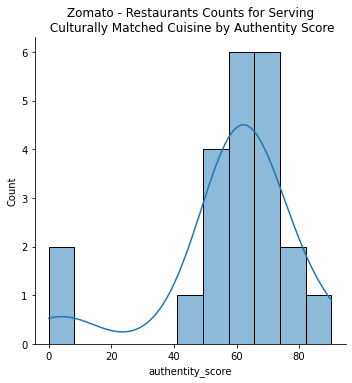

In [32]:
z_df_in = z_df[(z_df['category'].str.contains('chinese')) & (z_df['is_match_culture'] == 1)]
sns.displot(z_df_in, x="authentity_score", kde=True)
plt.title("Zomato - Restaurants Counts for Serving\n Culturally Matched Cuisine by Authentity Score");

## 2.4 Chinese Restaurants Counts for Serving Culturally Non-Matched Cuisine by Authentity Score

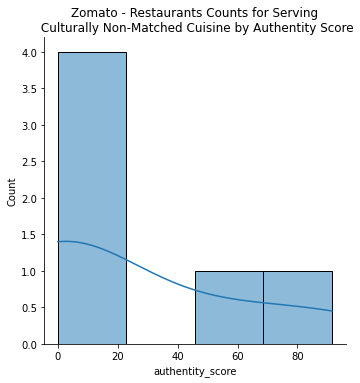

In [33]:
z_df_out = z_df[(z_df['category'].str.contains('chinese')) & (z_df['is_match_culture'] == 0)]
sns.displot(z_df_out, x="authentity_score", kde=True)
plt.title("Zomato - Restaurants Counts for Serving\n Culturally Non-Matched Cuisine by Authentity Score");

## 2.5 Comparison of Culture Neighborhood's and Other Neighborhoods's Chinese Restaurants Distribution Based on Authentity Score

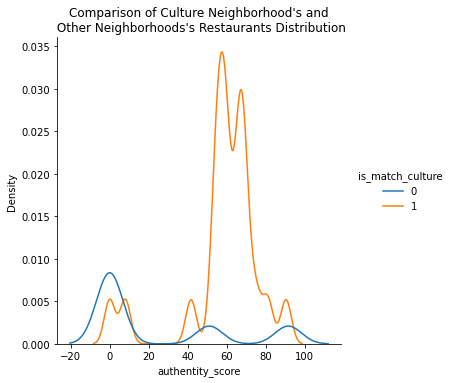

In [34]:
z_df_chinese = z_df[z_df['category'].str.contains('chinese')]
sns.displot(z_df_chinese, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 2.6 Comparison of Culture Neighborhood's and Other Neighborhoods's Italian Restaurants Distribution Based on Authentity Score

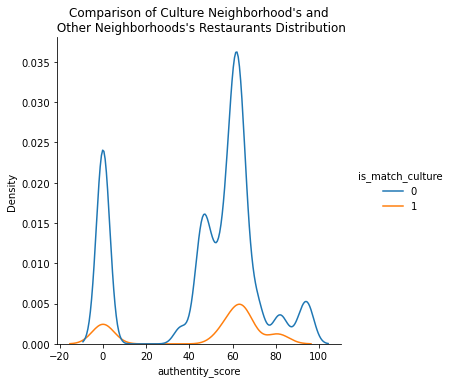

In [35]:
z_df_italian = z_df[z_df['category'].str.contains('italian')]
sns.displot(z_df_italian, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 2.7 Comparison of Culture Neighborhood's and Other Neighborhoods's German Restaurants Distribution Based on Authentity Score

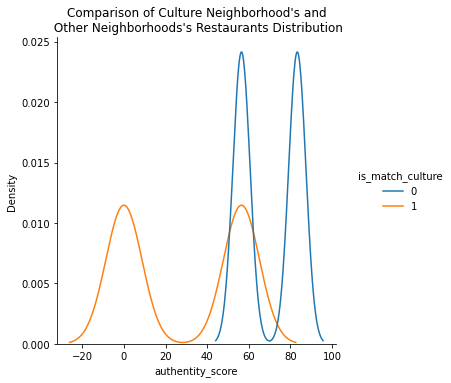

In [36]:
z_df_german = z_df[z_df['category'].str.contains('german')]
sns.displot(z_df_german, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=.25, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 2.8 Comparison of Culture Neighborhood's and Other Neighborhoods's Mexican Restaurants Distribution Based on Authentity Score

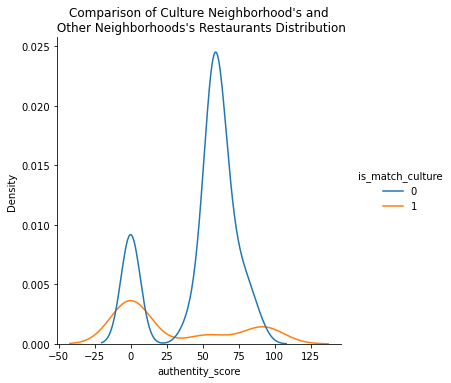

In [37]:
z_df_mexican = z_df[z_df['category'].str.contains('mexican')]
sns.displot(z_df_mexican, x="authentity_score", hue="is_match_culture", kind="kde", bw_adjust=0.5, fill=False)
plt.title("Comparison of Culture Neighborhood's and\n Other Neighborhoods's Restaurants Distribution");

## 2.9 Restaurant Counts by Average Rating

In [39]:
def count_res(z_score_range, min_range, max_range):
    '''
    Count number of restaurants in certain range of average rating
    '''
    result = len(z_score_range[(z_score_range['avg_rating'] < max_range) &
                               (z_score_range['avg_rating'] >= min_range)])
    return result

z_score_range = z_df[(z_df['authentity_score'] < 100)&(z_df['authentity_score'] >= 90)]

print('Num of restaurants which average rating is 2.0-2.5:', count_res(z_score_range, 2, 2.5),'\n'
      'Num of restaurants which average rating is 2.5-3.0:', count_res(z_score_range, 2.5, 3),'\n'
      'Num of restaurants which average rating is 3.5-4.0:', count_res(z_score_range, 3.5, 4),'\n'
      'Num of restaurants which average rating is 4.0-4.5:', count_res(z_score_range, 4, 4.5),'\n'
      'Num of restaurants which average rating is 4.5-5.0:', count_res(z_score_range, 4.5, 5),'\n')

Num of restaurants which average rating is 2.0-2.5: 0 
Num of restaurants which average rating is 2.5-3.0: 1 
Num of restaurants which average rating is 3.5-4.0: 2 
Num of restaurants which average rating is 4.0-4.5: 1 
Num of restaurants which average rating is 4.5-5.0: 0 



In [40]:
authentity_score = ['0-10', '10-20', '20-30', '30-40', '40-50', 
                    '50-60', '60-70', '70-80', '80-90', '90-100']
avg_rating = ["2.0-2.5", "2.5-3.0", "3.5-4.0", "4.0-4.5", "4.5-5.0"]
colors = ['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c']

data = {'authentity_score' : authentity_score,
        '2.0-2.5': [2, 0, 0, 0, 0, 3, 1, 0, 0, 0],
        '2.5-3.0': [9, 0, 1, 0, 4, 8, 7, 2, 1, 1],
        '3.5-4.0': [61, 0, 0, 8, 20, 62, 62, 21, 13, 2],
        '4.0-4.5': [1, 0, 0, 0, 5, 47, 50, 8, 3, 1],
        '4.5-5.0': [0, 0, 0, 0, 0, 7, 4, 2, 0, 0]}

p = figure(x_range=authentity_score, height=500, title="Zomato - Restaurant Counts by Average Rating",
           toolbar_location=None, tools="hover", tooltips="$name @avg_rating: @$name")
p.vbar_stack(avg_rating, x='authentity_score', width=0.9, color=colors, source=data,
             legend_label=avg_rating)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.axis_label = "Authentity Score"
p.yaxis.axis_label = "Counts of Restaurant"

show(p)